# Operaciones de crédito colocadas en el sector agropecuario 2021 - 2023


#### Ficha tecnica

Información General:

- Fuente de datos: Datos abiertos Colombia - [Colocaciones de Crédito Sector Agropecuario - 2021- 2023](https://www.datos.gov.co/d/w3uf-w9ey)

- Fecha de actualización: 26 de marzo de 2024
- Fecha de creación: 31-03-2021
- Filas: 1.512.744 
- Columnas: 27

Información de la entidad:

- Área o dependencia: Fondo para el financiamiento del Sector Agropecuario
- Nombre de la entidad: Fondo para el Financiamiento del Sector Agropecuario.
- Departamento: Bogotá D.C.
- Municipio: Bogotá D.C.
- Orden: Nacional
- Sector: Hacienda y Crédito Público

Temas:

Categoría: 	Agricultura y Desarrollo Rural
Etiquetas: colocación,finagro

#### **importando librerias**

In [1]:

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc
import warnings
import sqlite3

# Se configura la forma en que los números flotantes se muestran al imprimir un DataFrame en pandas.
    # Se define función lambda que toma un número x y devuelve ese número formateado con 1 decimal.
pd.set_option('display.float_format', lambda x: '%.1f' % x)

#### **Conexion y consulta de datos**

In [2]:
try:
    # Leer el archivo CSV ubicado en la ruta especificada y asigna los datos a la variable df_resultados
    df_Colocaciones_de_Credito_Agropecuario = pd.read_csv('C:/Users/bladi/OneDrive/Escritorio/BOOTCAMP_DATOS/Datos/Colocaciones credito_Sector_Agropecuario.csv')

    # Si la lectura del archivo es exitosa, imprime un mensaje indicando que el dataset se cargó correctamente
    print("El dataset se cargó exitosamente.")

# Si se produce un error específico de "FileNotFoundError" (archivo no encontrado), ejecuta este bloque de código
except FileNotFoundError as e:
    
    # Imprime un mensaje de error personalizado indicando que el archivo no se pudo encontrar, junto con los detalles específicos del error
    print(f"Error: El archivo no se pudo encontrar. Detalles: {e}")

# Si se produce cualquier otro tipo de error, ejecuta este bloque de código
except Exception as e:
    
    # Imprime un mensaje de error genérico indicando que ocurrió un error inesperado, junto con los detalles específicos del error
    print(f"Error inesperado: {e}")

El dataset se cargó exitosamente.


In [3]:
# Se crea un DataFrame nuevo, utilizando los datos existentes del dataset
df_Colocaciones_de_Credito_Agropecuario = pd.DataFrame(df_Colocaciones_de_Credito_Agropecuario)

# Consulta y validación de la cantidad de filas y columnas del dataframe
num_rows, num_cols = df_Colocaciones_de_Credito_Agropecuario.shape

# Imprimir mensaje y valores de salidas del dataframe
print(f'El DataFrame, tiene {num_rows} filas y {num_cols} columnas.')

El DataFrame, tiene 1512744 filas y 27 columnas.


In [4]:
# La función sample, devuelve la cantidad aleatorias de filas/registros solicitada del dataframe
df_Colocaciones_de_Credito_Agropecuario.sample(5)

,Año,Mes,fuente Colocacion,Id Tipo Prod,Tipo Productor,Valor Inversion,Colocacion,ID Depto,Departamento Inversion,Id Munic,...,Linea de Credito,Linea de Produccion,ID Rubro,Destino de Credito,Genero,% FAG,Vlr Inic Garantia,LATITUD,LONGITUD,CANTIDAD
951415,2022,12,REDESCUENTO,0,PEQUEÑO,10950000.0,10950000.0,66,RISARALDA,66594,...,Inversión,COMERCIALIZACION (I),641160,641160 Compra de transporte no especializado n...,H,80.0,8760000.0,5.3,-75.7,1
850712,2022,11,SUSTITUTA,0,PEQUEÑO,1087120.0,1087120.0,54,NORTE DE SANTANDER,54003,...,Capital de Trabajo,MICROCREDITO (CT),165000,165000 Capital de trabajo Microcrédito rural,H,NaN,NaN,8.0,-73.2,1
60756,2021,4,REDESCUENTO,0,PEQUEÑO,5300000.0,5300000.0,66,RISARALDA,66088,...,Inversión,SIEMBRAS (I),141100,141100 Café,H,80.0,4240000.0,5.2,-75.9,1
349712,2021,8,REDESCUENTO,0,PEQUEÑO,1900000.0,1900000.0,19,CAUCA,19142,...,Inversión,MAQUINARIA Y EQUIPO (I),105001,105001 Equipos y sistemas nuevos para riego y ...,H,80.0,1520000.0,3.1,-76.3,1
778864,2022,9,REDESCUENTO,0,PEQUEÑO,15000000.0,15000000.0,25,CUNDINAMARCA,25524,...,Inversión,SIEMBRAS (I),141700,"141700 Cultivos, mantenimiento etapa improduct...",M,80.0,12000000.0,4.2,-74.5,1


In [5]:
pd.DataFrame(df_Colocaciones_de_Credito_Agropecuario.columns, columns= ['Columnas'])

,Columnas
0,Año
1,Mes
2,fuente Colocacion
3,Id Tipo Prod
4,Tipo Productor
5,Valor Inversion
6,Colocacion
7,ID Depto
8,Departamento Inversion
9,Id Munic


In [6]:
df_Colocaciones_de_Credito_Agropecuario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512744 entries, 0 to 1512743
Data columns (total 27 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Año                                    1512744 non-null  int64  
 1   Mes                                    1512744 non-null  int64  
 2   fuente Colocacion                      1512744 non-null  object 
 3   Id Tipo Prod                           1512744 non-null  int64  
 4   Tipo Productor                         1512744 non-null  object 
 5   Valor Inversion                        1512744 non-null  float64
 6   Colocacion                             1512744 non-null  float64
 7   ID Depto                               1512744 non-null  int64  
 8   Departamento Inversion                 1512744 non-null  object 
 9   Id Munic                               1512744 non-null  int64  
 10  Municipio Inversion                    151

In [7]:
# Descripción estadística de las variables numéricas sin notación científica
df_Colocaciones_de_Credito_Agropecuario.describe()

,Año,Mes,Id Tipo Prod,Valor Inversion,Colocacion,ID Depto,Id Munic,DEPCOL,MUNCOL,Plazo,ID Rubro,% FAG,Vlr Inic Garantia,LATITUD,LONGITUD,CANTIDAD
count,1512744.0,1512744.0,1512744.0,1512744.0,1512744.0,1512744.0,1512744.0,1512744.0,1512744.0,1512744.0,1512744.0,954674.0,954674.0,1512744.0,1512744.0,1512744.0
mean,2022.0,6.6,0.7,72664231.3,53425826.2,38.9,39273.6,37.5,37839.0,42.8,218869.8,79.8,11301032.3,5.1,-74.9,1.0
std,0.8,3.4,1.1,2548708840.4,1025254572.5,25.4,25395.3,25.5,25546.4,31.2,145140.0,11.1,22784685.8,2.5,1.6,0.0
min,2021.0,1.0,0.0,1.0,1.0,5.0,5001.0,5.0,5001.0,1.0,101002.0,1.0,83200.0,-4.2,-81.8,1.0
25%,2021.0,4.0,0.0,3450000.0,3228960.0,17.0,17088.0,15.0,15696.0,13.0,141280.0,80.0,4000000.0,3.1,-76.0,1.0
50%,2022.0,7.0,0.0,9750000.0,8000000.0,27.0,27245.0,25.0,25785.0,36.0,165000.0,80.0,8000000.0,5.2,-75.1,1.0
75%,2023.0,10.0,1.0,17000000.0,16000000.0,66.0,66045.0,54.0,54810.0,66.0,253100.0,80.0,12800000.0,6.5,-73.6,1.0
max,2023.0,12.0,3.0,1499500000000.0,300000000000.0,99.0,99773.0,99.0,99773.0,240.0,920009.0,100.0,3969476148.0,12.6,-67.0,1.0


#### <span style='color: #21B8E5'> Observaciones </span>
`Valor Inversion:`
- La mayoria de los datos se concentran en el 2022 y 2023
- La media de Colocación es de $53.425.826 

In [8]:
# Descripción de las variables categóricas
df_Colocaciones_de_Credito_Agropecuario.describe(include = ['object'])

,fuente Colocacion,Tipo Productor,Departamento Inversion,Municipio Inversion,Municipio de PostConflico?,Departamento de Colocacion de Credito,Municipio Colocacion de Credito,Linea de Credito,Linea de Produccion,Destino de Credito,Genero
count,1512744,1512744,1512744,1512744,1512744,1512744,1512744,1512744,1512744,1512744,1512744
unique,3,4,33,1030,2,33,791,3,17,569,3
top,REDESCUENTO,PEQUEÑO,BOYACÁ,"BOGOTÁ, D.C.",N,ANTIOQUIA,"BOGOTÁ, D.C.",Capital de Trabajo,SOSTENIMIENTO (CT),165000 CAPITAL DE TRABAJO - MICROCRÉDITO AGROP...,H
freq,1043423,1031664,153521,15889,1043947,156999,68414,823159,351026,155175,887160


In [9]:
# Identificar valores únicos por columna
print("\n Valores únicos por columna:")
for column in df_Colocaciones_de_Credito_Agropecuario:
    unique_values = df_Colocaciones_de_Credito_Agropecuario[column].unique()
    print(f"\n{column} ({len(unique_values)} valores únicos):\n{unique_values[:10]}")
    if len(unique_values) > 10:
        print("....")


 Valores únicos por columna:

Año (3 valores únicos):
[2021 2022 2023]

Mes (12 valores únicos):
[ 4  9  6  5  7  8  2  1  3 11]
....

fuente Colocacion (3 valores únicos):
['REDESCUENTO' 'SUSTITUTA' 'AGROPECUARIA']

Id Tipo Prod (4 valores únicos):
[1 0 2 3]

Tipo Productor (4 valores únicos):
['MEDIANO' 'PEQUEÑO' 'GRANDE' 'PEQUEÑO PPIB']

Valor Inversion (112803 valores únicos):
[24000000.  6000000.  8200000. 15000000. 10000000. 10500000.  5000000.
  3575000.  2500000.  3500000.]
....

Colocacion (195170 valores únicos):
[23655000.  5000000.  8200000. 15000000. 10000000. 10500000.  3575000.
  2500000.  3500000. 11000000.]
....

ID Depto (33 valores únicos):
[ 5 68 41 85 20 25 23 73 66 15]
....

Departamento Inversion (33 valores únicos):
['ANTIOQUIA' 'SANTANDER' 'HUILA' 'CASANARE' 'CESAR' 'CUNDINAMARCA'
 'CÓRDOBA' 'TOLIMA' 'RISARALDA' 'BOYACÁ']
....

Id Munic (1108 valores únicos):
[ 5237 68169 41807 85139 85300 85136 20614 25183 23350 73563]
....

Municipio Inversion (1030 valores 

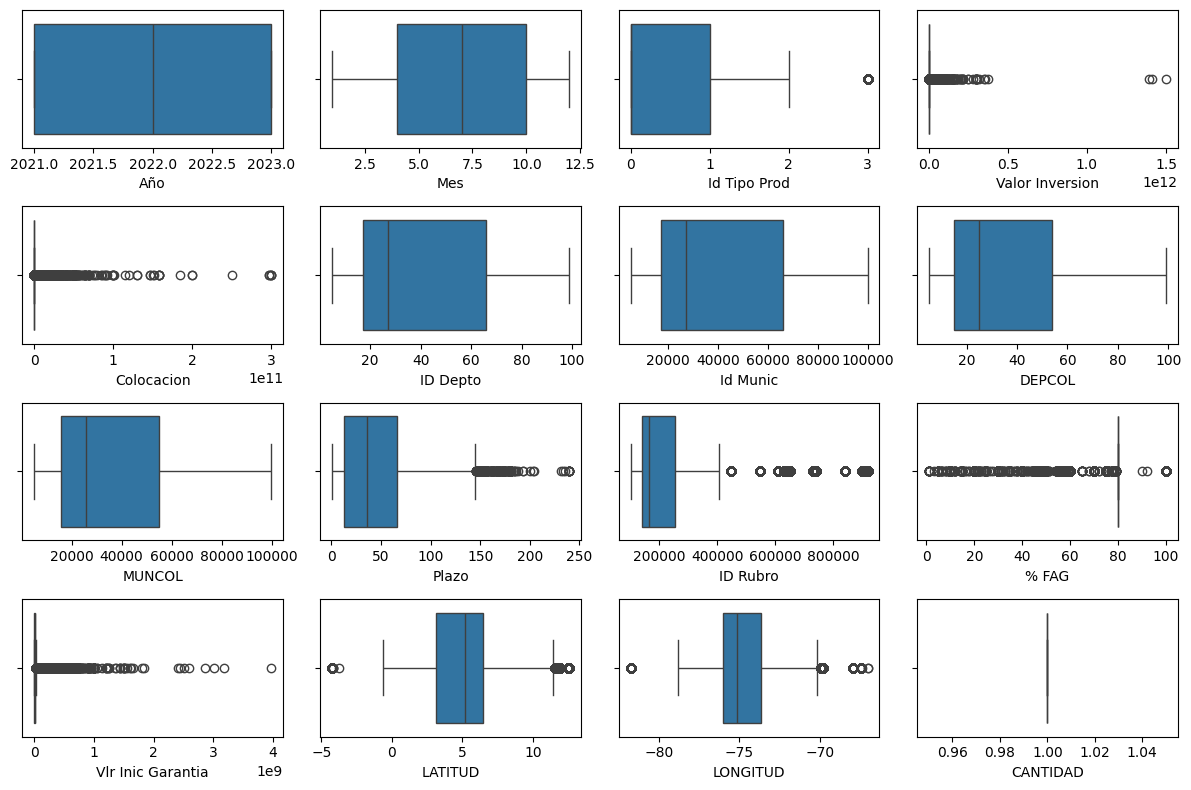

In [10]:
# Identificar valores atípicos en las variables numéricas
numeric_cols = df_Colocaciones_de_Credito_Agropecuario.select_dtypes(include=['float','int64']).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data = df_Colocaciones_de_Credito_Agropecuario, x = col)

plt.tight_layout()
plt.show()

In [11]:
# Análisis de valores faltantes por columna
datos_faltes = df_Colocaciones_de_Credito_Agropecuario.isnull().sum()
porcentajes_faltantes = (df_Colocaciones_de_Credito_Agropecuario.isnull().sum()/len(df_Colocaciones_de_Credito_Agropecuario))*100

faltantes_df = pd.DataFrame({
    'Valores faltes' : datos_faltes,
    'Porcentaje (%)': porcentajes_faltantes            
})

# Ordenar de manera descendente por porcentaje de valores faltantes
faltantes_df = faltantes_df.sort_values(by = 'Porcentaje (%)', ascending=False)
faltantes_df

,Valores faltes,Porcentaje (%)
Vlr Inic Garantia,558070,36.9
% FAG,558070,36.9
Año,0,0.0
MUNCOL,0,0.0
LONGITUD,0,0.0
LATITUD,0,0.0
Genero,0,0.0
Destino de Credito,0,0.0
ID Rubro,0,0.0
Linea de Produccion,0,0.0


#### **Limpieza**

In [12]:
df_Colocaciones_de_Credito_Agropecuario[['Departamento Inversion','DEPCOL', 'ID Depto']]

,Departamento Inversion,DEPCOL,ID Depto
0,ANTIOQUIA,5,5
1,SANTANDER,68,68
2,HUILA,41,41
3,CASANARE,85,85
4,CASANARE,15,85
...,...,...,...
1512739,CALDAS,63,17
1512740,NARIÑO,52,52
1512741,CÓRDOBA,23,23
1512742,BOYACÁ,15,15


se encontro valores repetidos y al comparar la información con el DANE la columna DEPCOL tiene algunos datos erroneos 

In [13]:
df_Colocaciones_de_Credito_Agropecuario[['Municipio Inversion','MUNCOL', 'Id Munic']]

,Municipio Inversion,MUNCOL,Id Munic
0,DONMATÍAS,5237,5237
1,CHARTA,68001,68169
2,TIMANÁ,41807,41807
3,MANÍ,85139,85139
4,SABANALARGA,15425,85300
...,...,...,...
1512739,ANSERMA,63001,17042
1512740,GUALMATÁN,52323,52323
1512741,SAHAGÚN,23660,23660
1512742,MONIQUIRÁ,15469,15469


se encontro valores repetidos y al comparar la información con el DANE la columna MUNCOL tiene algunos datos erroneos 

#### **Eliminando columna**

Entonces se procede a eliminación de las celdas DEPCOL Y MUNCOL

In [14]:
try:
    df_Colocaciones_de_Credito_Agropecuario = df_Colocaciones_de_Credito_Agropecuario.drop(columns= ['DEPCOL', 'MUNCOL'])
    print("Las columnas seleccionadas se eliminaron con éxito.")
except KeyError as e:
    print(f"Error al eliminar las columnas: {e}. Algunas columnas no existen en el DataFrame.")

Las columnas seleccionadas se eliminaron con éxito.


In [15]:
# Se crea un DataFrame nuevo, utilizando los datos existentes del dataset
df_Colocaciones_de_Credito_Agropecuario = pd.DataFrame(df_Colocaciones_de_Credito_Agropecuario)

# Consulta y validación de la cantidad de filas y columnas del dataframe
num_rows, num_cols = df_Colocaciones_de_Credito_Agropecuario.shape

# Imprimir mensaje y valores de salidas del dataframe
print(f'El DataFrame, tiene {num_rows} filas y {num_cols} columnas.')

El DataFrame, tiene 1512744 filas y 25 columnas.


#### **Tratamiento de datos faltantes**

- se reemplara los NaN por el valor 0 en las columnas "Vlr Inic Garantia" y "% FAG que representan un 36%"

In [16]:
df_Colocaciones_de_Credito_Agropecuario.fillna({'Vlr Inic Garantia': 0, '% FAG': 0}, inplace= True)

In [17]:
# Análisis de valores faltantes por columna
datos_faltes = df_Colocaciones_de_Credito_Agropecuario.isnull().sum()
porcentajes_faltantes = (df_Colocaciones_de_Credito_Agropecuario.isnull().sum()/len(df_Colocaciones_de_Credito_Agropecuario))*100

faltantes_df = pd.DataFrame({
    'Valores faltes' : datos_faltes,
    'Porcentaje (%)': porcentajes_faltantes            
})

# Ordenar de manera descendente por porcentaje de valores faltantes
faltantes_df = faltantes_df.sort_values(by = 'Porcentaje (%)', ascending=False)
faltantes_df

,Valores faltes,Porcentaje (%)
Año,0,0.0
Municipio Colocacion de Credito,0,0.0
LONGITUD,0,0.0
LATITUD,0,0.0
Vlr Inic Garantia,0,0.0
% FAG,0,0.0
Genero,0,0.0
Destino de Credito,0,0.0
ID Rubro,0,0.0
Linea de Produccion,0,0.0


In [18]:
##Cambiando todas las columnas en mayusculas
for columna in df_Colocaciones_de_Credito_Agropecuario.columns:
    df_Colocaciones_de_Credito_Agropecuario.rename(columns={columna: columna.upper()}, inplace=True)

In [19]:
#Cambiando columnas que se puede observar que tienen caracteres especiales
df_Colocaciones_de_Credito_Agropecuario.rename(columns={ 'AÑO' : 'ANIO',
                                        'MUNICIPIO DE POSTCONFLICO?' : 'MUNICIPIO DE POSTCONFLICTO', 
                                        '% FAG' : 'FAG'},
                                        inplace=True)

In [36]:
pd.DataFrame(df_Colocaciones_de_Credito_Agropecuario.columns)

,0
0,ANIO
1,MES
2,FUENTE COLOCACION
3,ID TIPO PROD
4,TIPO PRODUCTOR
5,VALOR INVERSION
6,COLOCACION
7,ID DEPTO
8,DEPARTAMENTO INVERSION
9,ID MUNIC


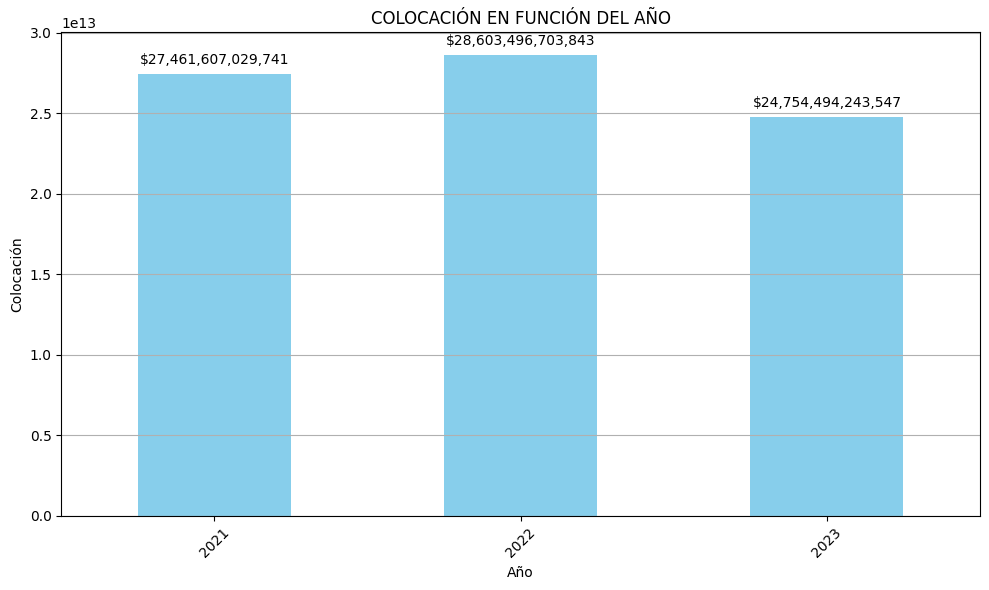

In [20]:
# Calcular la suma de los valores de colocación por año
colocacion_por_anio = df_Colocaciones_de_Credito_Agropecuario.groupby('ANIO')['COLOCACION'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = colocacion_por_anio.plot(kind='bar', color='skyblue')
plt.title('COLOCACIÓN EN FUNCIÓN DEL AÑO')
plt.xlabel('Año')
plt.ylabel('Colocación')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Agregar el valor de la etiqueta en la parte superior de cada barra
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


In [21]:
# Top 5 numero de municipios con mas credito otorgado
top_5_municipios = df_Colocaciones_de_Credito_Agropecuario.groupby('MUNICIPIO COLOCACION DE CREDITO')['COLOCACION'].mean().nlargest(5)
top_5_municipios

MUNICIPIO COLOCACION DE CREDITO
GUATAPÉ        1292507488.7
CALI            841010873.3
COTA            789027400.7
MEDELLÍN        742198155.5
BARRANQUILLA    687735079.8
Name: COLOCACION, dtype: float64

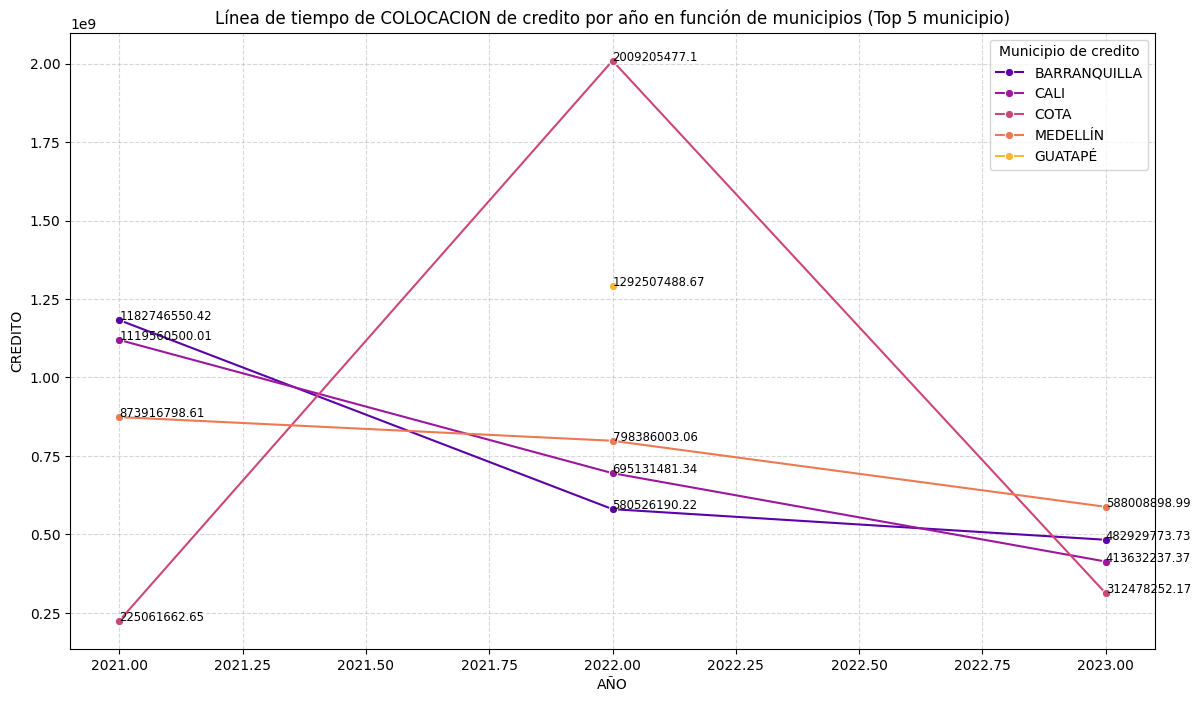

In [22]:
# Top 5 numero de municipios con mas credito otorgado
top_5_municipios = df_Colocaciones_de_Credito_Agropecuario.groupby('MUNICIPIO COLOCACION DE CREDITO')['COLOCACION'].mean().nlargest(5).index

# Filtrar los datos para incluir solo los municipios del top 5
datos_top5_municipios = df_Colocaciones_de_Credito_Agropecuario[df_Colocaciones_de_Credito_Agropecuario['MUNICIPIO COLOCACION DE CREDITO'].isin(top_5_municipios)]

# Agrupar datos por periodo y municipio del credito
credito_por_periodo_y_municipio = datos_top5_municipios.groupby(['ANIO','MUNICIPIO COLOCACION DE CREDITO'])['COLOCACION'].mean().reset_index()

# Crear la línea de tiempo
plt.figure(figsize=(14, 8))

# Usar una paleta de colores más atractiva
palette =sns.color_palette("plasma", len(top_5_municipios))

# Crear la línea de tiempo con puntos y etiquetas de valor
sns.lineplot(x='ANIO', y='COLOCACION', hue='MUNICIPIO COLOCACION DE CREDITO', data=credito_por_periodo_y_municipio, palette= palette, marker= 'o')

# Añadir etiquetas de valor a cada punto
for line in range(0, credito_por_periodo_y_municipio.shape[0]):
    plt.text(credito_por_periodo_y_municipio.ANIO[line], credito_por_periodo_y_municipio.COLOCACION[line],
             round(credito_por_periodo_y_municipio.COLOCACION[line], 2), horizontalalignment='left', size='small', color='black')

# Configurar el gráfico
plt.title('Línea de tiempo de COLOCACION de credito por año en función de municipios (Top 5 municipio)')
plt.xlabel('AÑO')
plt.ylabel('CREDITO')

# Añadir una grilla de fondo para facilitar la lectura
plt.grid(True, which='both', linestyle='--', alpha=0.5)

# Configurar la leyenda para mejorar la presentación
plt.legend(title='Municipio de credito')

# Mostrar el gráfico
plt.show()

In [23]:
df_Colocaciones_de_Credito_Agropecuario.groupby('MUNICIPIO COLOCACION DE CREDITO')['COLOCACION'].mean().nlargest(5)

MUNICIPIO COLOCACION DE CREDITO
GUATAPÉ        1292507488.7
CALI            841010873.3
COTA            789027400.7
MEDELLÍN        742198155.5
BARRANQUILLA    687735079.8
Name: COLOCACION, dtype: float64

In [24]:
df_guatape = df_Colocaciones_de_Credito_Agropecuario[df_Colocaciones_de_Credito_Agropecuario['MUNICIPIO COLOCACION DE CREDITO'] == 'GUATAPÉ']
df_guatape[['ANIO', 'MUNICIPIO COLOCACION DE CREDITO']]

,ANIO,MUNICIPIO COLOCACION DE CREDITO
747504,2022,GUATAPÉ
747842,2022,GUATAPÉ
747847,2022,GUATAPÉ


**Observaciones**

- Se puede observar que el  municipio guatape tiene mayor promedio debido a que solo recibio creditos en el año 2022
- Tambien se puede observar que el municipio de cota fue el que mas credito recibio en el año 2022


In [25]:
# Reemplazar 'S' por 'Persona Jurídica' en la columna 'Genero'
df_Colocaciones_de_Credito_Agropecuario['GENERO'] = df_Colocaciones_de_Credito_Agropecuario['GENERO'].replace('S', 'Persona Jurídica')

# Verificar los cambios
print(df_Colocaciones_de_Credito_Agropecuario['GENERO'].value_counts())  # Comprobar la distribución de los géneros después del cambio


GENERO
H                   887160
M                   555872
Persona Jurídica     69712
Name: count, dtype: int64


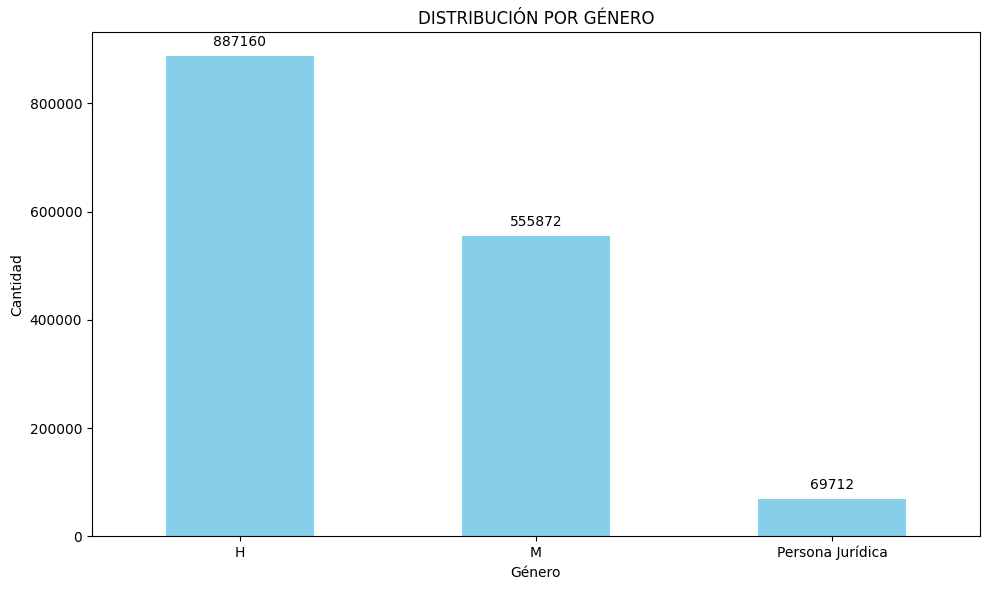

In [26]:
# Contar el número de registros por género
distribucion_genero = df_Colocaciones_de_Credito_Agropecuario['GENERO'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = distribucion_genero.plot(kind='bar', color='skyblue')
plt.title('DISTRIBUCIÓN POR GÉNERO')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  # Mantener la orientación de las etiquetas en el eje x horizontal

# Agregar el valor de las etiquetas en la parte superior de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

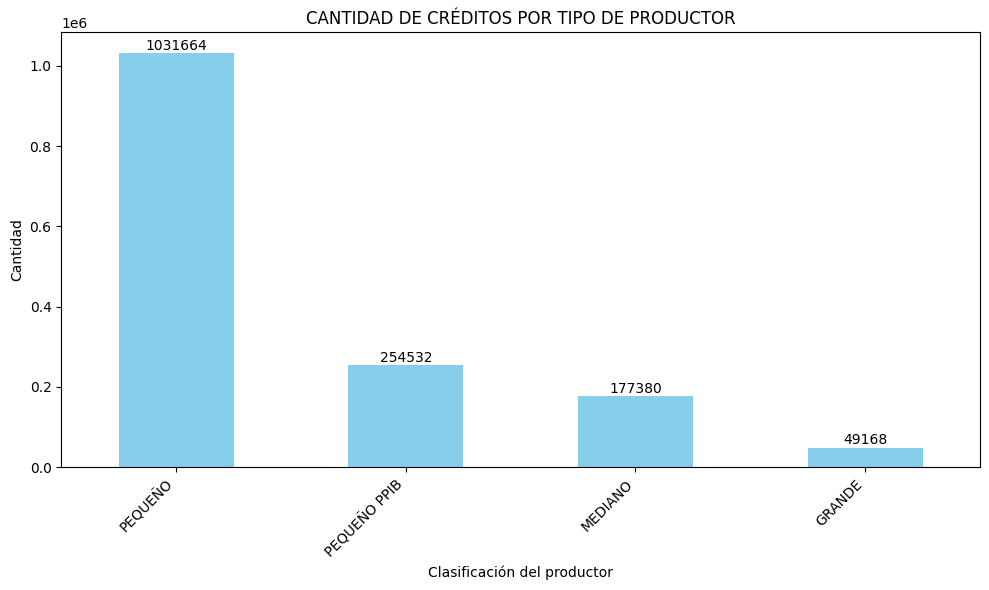

In [27]:
# Contar el número de veces que aparece cada tipo de productor
distribucion_tipo_productor = df_Colocaciones_de_Credito_Agropecuario['TIPO PRODUCTOR'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = distribucion_tipo_productor.plot(kind='bar', color='skyblue')
plt.title('CANTIDAD DE CRÉDITOS POR TIPO DE PRODUCTOR')
plt.xlabel('Clasificación del productor')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')

# Agregar el conteo en la parte superior de cada barra
for i, v in enumerate(distribucion_tipo_productor):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

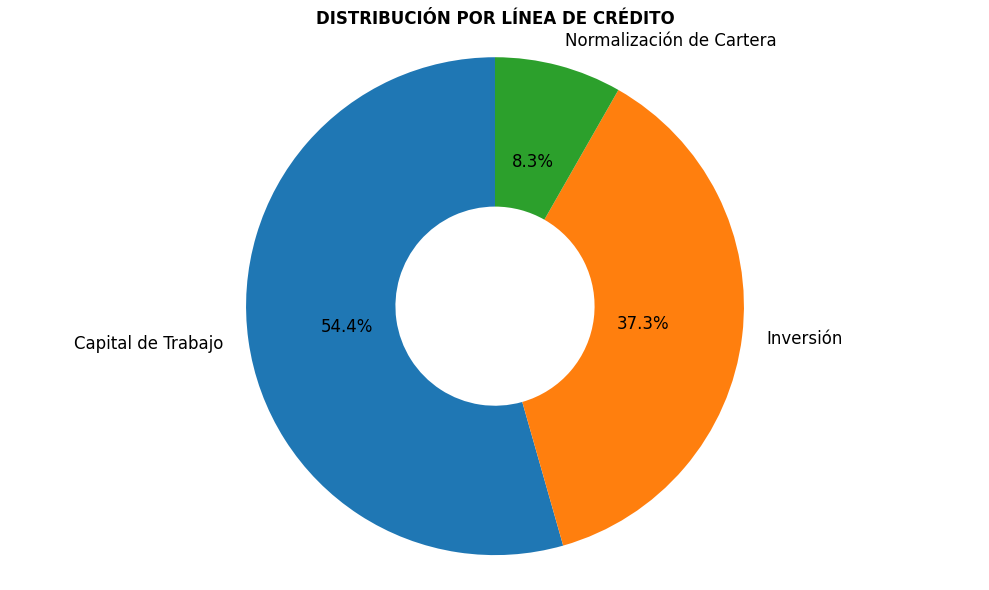

In [28]:
# Generar conteo de registros por valor único en la columna Linea de Credito
df_linea_credito = df_Colocaciones_de_Credito_Agropecuario['LINEA DE CREDITO'].value_counts().reset_index()
df_linea_credito.columns = ['LINEA DE CREDITO', 'CANTIDAD']

# Configurar etiquetas
labels = df_linea_credito['LINEA DE CREDITO']
sizes = df_linea_credito['CANTIDAD']
explode = None  # Sin separación entre etiquetas

# Configurar la figura y el eje
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

# Crear gráfico de dona
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12}, wedgeprops={'width': 0.6})

# Mostrar resultados
plt.title('DISTRIBUCIÓN POR LÍNEA DE CRÉDITO', fontdict={'fontweight': 'bold'})
plt.axis('equal')  # Asegurar que la dona tenga forma de círculo
plt.tight_layout()
plt.show()




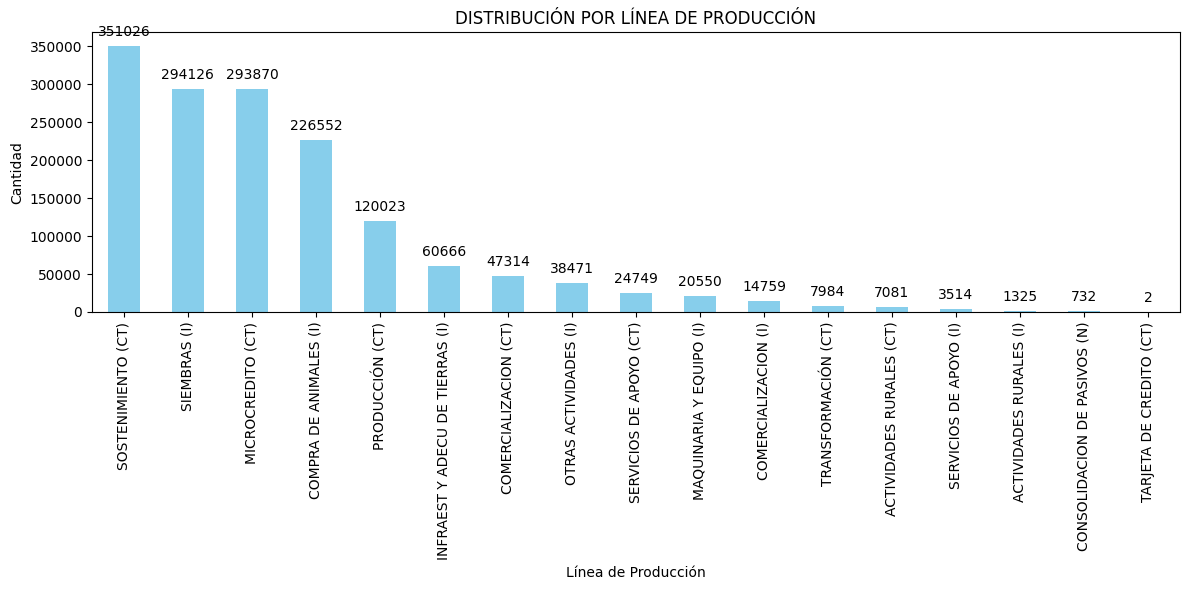

In [29]:
# Generar conteo de registros por valor único en la columna Linea de Produccion
distribucion_linea_produccion = df_Colocaciones_de_Credito_Agropecuario['LINEA DE PRODUCCION'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = distribucion_linea_produccion.plot(kind='bar', color='skyblue')
plt.title('DISTRIBUCIÓN POR LÍNEA DE PRODUCCIÓN')
plt.xlabel('Línea de Producción')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad

# Agregar el valor de las etiquetas en la parte superior de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


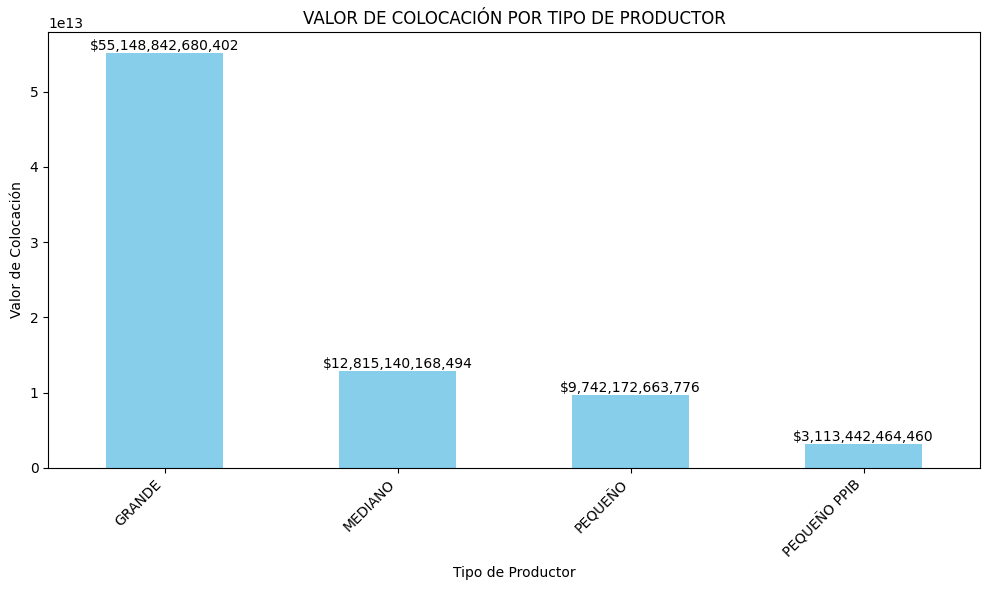

In [30]:
# Calcular la suma de los valores de colocación por cada tipo de productor
valor_colocacion_por_tipo_productor = df_Colocaciones_de_Credito_Agropecuario.groupby('TIPO PRODUCTOR')['COLOCACION'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = valor_colocacion_por_tipo_productor.plot(kind='bar', color='skyblue')
plt.title('VALOR DE COLOCACIÓN POR TIPO DE PRODUCTOR')
plt.xlabel('Tipo de Productor')
plt.ylabel('Valor de Colocación')
plt.xticks(rotation=45, ha='right')

# Agregar el valor de colocación en la parte superior de cada barra
for i, v in enumerate(valor_colocacion_por_tipo_productor):
    ax.text(i, v + 5000000, f'${v:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

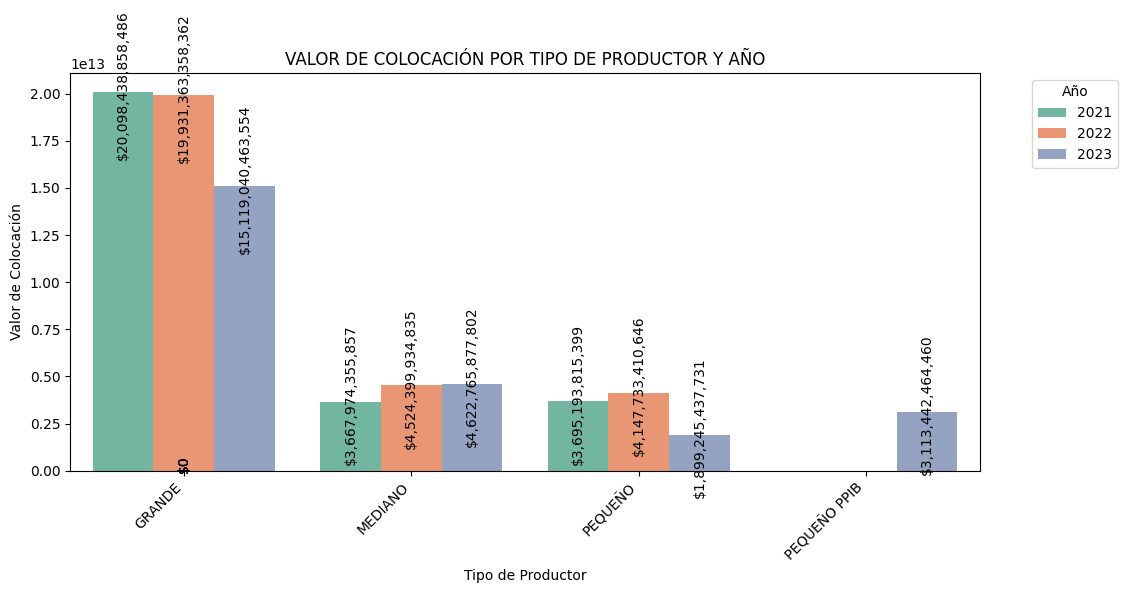

In [31]:
# Calcular la suma de los valores de colocación por cada tipo de productor y año
valor_colocacion_por_tipo_y_anio = df_Colocaciones_de_Credito_Agropecuario.groupby(['TIPO PRODUCTOR', 'ANIO'])['COLOCACION'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=valor_colocacion_por_tipo_y_anio, x='TIPO PRODUCTOR', y='COLOCACION', hue='ANIO', palette='Set2') # Cambia aquí la paleta de colores
plt.title('VALOR DE COLOCACIÓN POR TIPO DE PRODUCTOR Y AÑO')
plt.xlabel('Tipo de Productor')
plt.ylabel('Valor de Colocación')
plt.xticks(rotation=45, ha='right')

# Agregar el valor de colocación dentro de la barra en forma vertical
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', rotation=90, xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



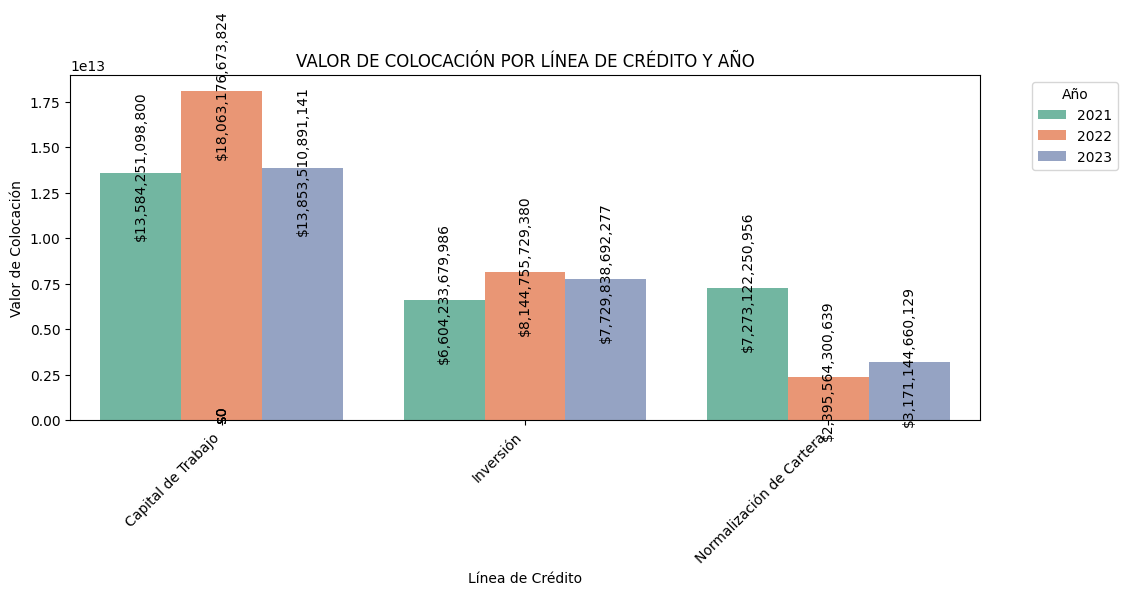

In [32]:
# Calcular la suma de los valores de colocación por cada línea de crédito y año
valor_colocacion_por_linea_credito_y_anio = df_Colocaciones_de_Credito_Agropecuario.groupby(['LINEA DE CREDITO', 'ANIO'])['COLOCACION'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=valor_colocacion_por_linea_credito_y_anio, x='LINEA DE CREDITO', y='COLOCACION', hue='ANIO', palette='Set2')
plt.title('VALOR DE COLOCACIÓN POR LÍNEA DE CRÉDITO Y AÑO')
plt.xlabel('Línea de Crédito')
plt.ylabel('Valor de Colocación')
plt.xticks(rotation=45, ha='right')

# Agregar el valor de colocación dentro de la barra en forma vertical
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', rotation=90, xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()





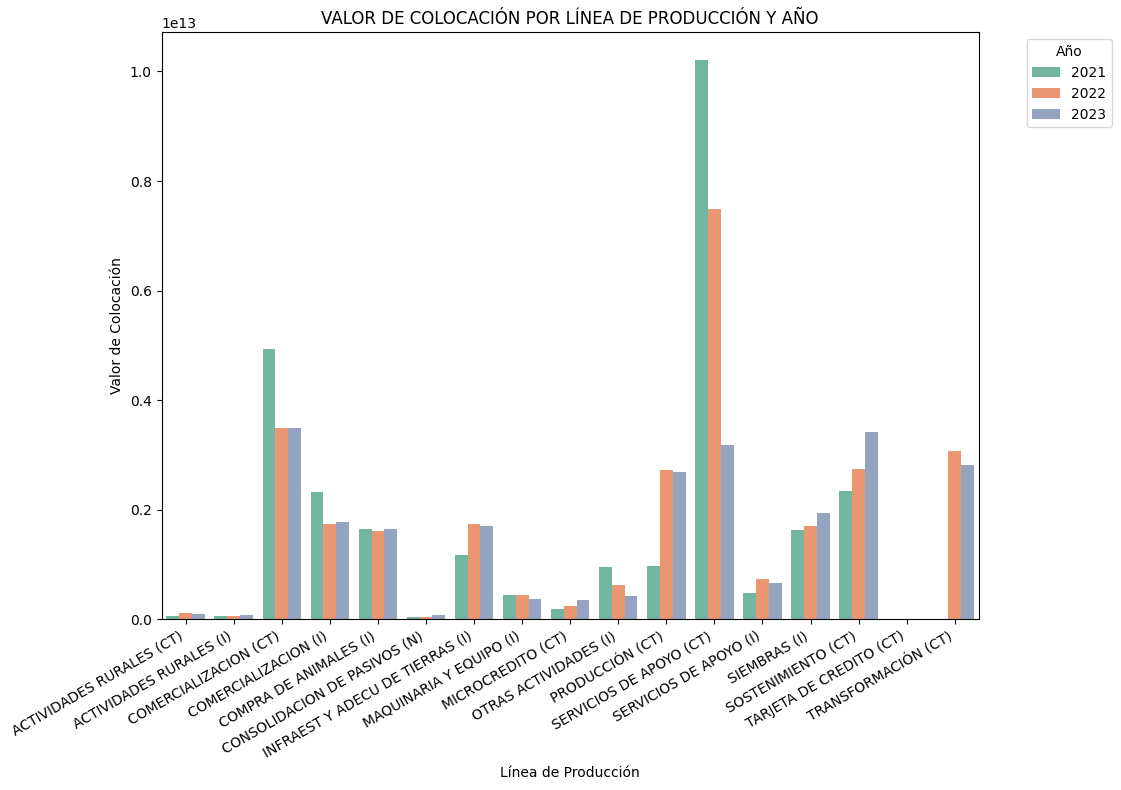

In [33]:
# Calcular la suma de los valores de colocación por cada línea de producción y año
valor_colocacion_por_linea_produccion_y_anio = df_Colocaciones_de_Credito_Agropecuario.groupby(['LINEA DE PRODUCCION', 'ANIO'])['COLOCACION'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=valor_colocacion_por_linea_produccion_y_anio, x='LINEA DE PRODUCCION', y='COLOCACION', hue='ANIO', palette='Set2')
plt.title('VALOR DE COLOCACIÓN POR LÍNEA DE PRODUCCIÓN Y AÑO')
plt.xlabel('Línea de Producción')
plt.ylabel('Valor de Colocación')
plt.xticks(rotation=45, ha='right')

# Ajustar el espacio entre los subgrupos de barras
ax.figure.autofmt_xdate()

plt.tight_layout()
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



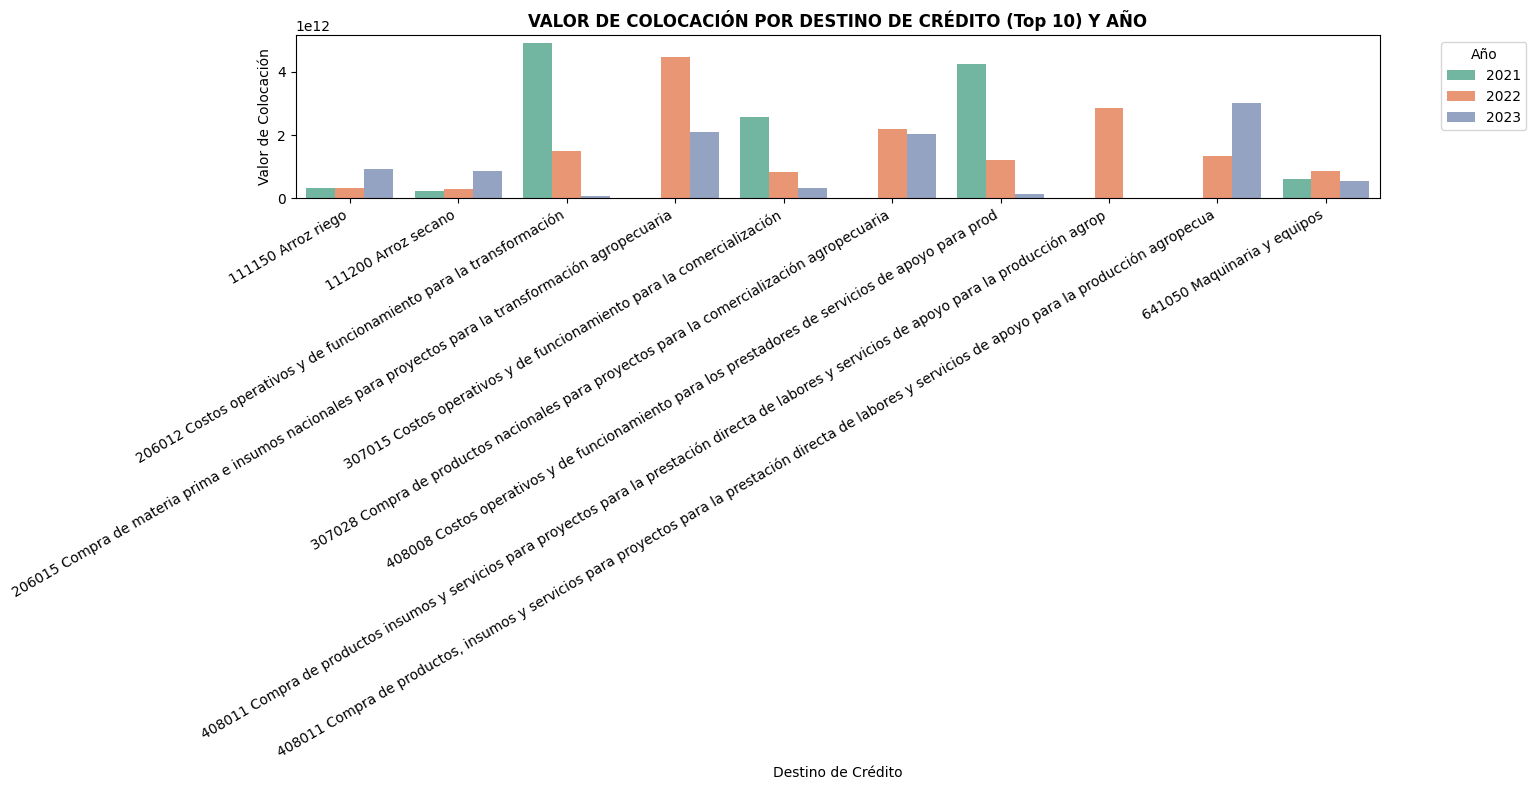

In [34]:
# Calcular la suma de los valores de colocación por destino de crédito y año
valor_colocacion_por_destino_y_anio = df_Colocaciones_de_Credito_Agropecuario.groupby(['DESTINO DE CREDITO', 'ANIO'])['COLOCACION'].sum().reset_index()

# Seleccionar los 10 destinos principales por valor total de colocación
top_10_destinos = valor_colocacion_por_destino_y_anio.groupby('DESTINO DE CREDITO')['COLOCACION'].sum().nlargest(10).index

# Filtrar el DataFrame original para incluir solo los destinos del top 10
valor_colocacion_top_10_destinos = valor_colocacion_por_destino_y_anio[valor_colocacion_por_destino_y_anio['DESTINO DE CREDITO'].isin(top_10_destinos)]

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=valor_colocacion_top_10_destinos, x='DESTINO DE CREDITO', y='COLOCACION', hue='ANIO', palette='Set2')
plt.title('VALOR DE COLOCACIÓN POR DESTINO DE CRÉDITO (Top 10) Y AÑO', fontdict={'fontweight': 'bold'})
plt.xlabel('Destino de Crédito')
plt.ylabel('Valor de Colocación')
plt.xticks(rotation=45, ha='right')

# Ajustar el espacio entre los subgrupos de barras
ax.figure.autofmt_xdate()

plt.tight_layout()
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
